### Analysis of Data Set1



In [3]:
%run "../common.ipynb"

fileName="Dataset1.xlsx";
dfOriginal = LoadDataSet(fileName, columns=None, checkForDateTime=False);


In [4]:
for j in dfOriginal.columns:
    print (j, ", ", sep='',end='')

Date, WeekDay, Daily Installs, Weekly Installs, Mean Install Duration, Daily Unique Users, New Unique Users, Sessions, Sessions per User, Weekly Active Users, 7D New Unique User, Mean Session Length, Total Daily Play Time (Minutes), TotalPlayTimeHours, LTDPlayYears, LTD Play Time (Minutes), 1 Day Returning Users, 3 Day Returning Users, 7 Day Returning Users, 30 Day Returning Users, Rounds Played, Players per Round, Hero Win Rate, Creatures Killed, Gold Spent, Gold Earned, Chests Opened, 

In [5]:
# Prepare dataset
#
# 1. Drop columns we don't need
# 2. Convert column datatypes as needed; to string, datetime, numbers as needed
# 3. Add Calculated Columns
# 4. Filter out rows and reindex the dataframe
# 5. Display the resulting dataframe
# 6. Show some descriptive statistics

#=====
#1. "ProcessedDateId" column is Intentionally misspelled to show it goes undetected if not careful

columns = '''Date, Daily Installs, Weekly Installs, Mean Install Duration, Daily Unique Users, New Unique Users, Sessions, Sessions per User, 
Weekly Active Users, 7D New Unique User, Mean Session Length, Total Daily Play Time (Minutes), TotalPlayTimeHours, LTD Play Time (Minutes), 
1 Day Returning Users, 3 Day Returning Users, 7 Day Returning Users, 30 Day Returning Users, Rounds Played, 
Players per Round, Hero Win Rate, Creatures Killed, Gold Spent, Gold Earned, Chests Opened,
'''
toDrop= [k.strip() for k in '''
'''.split(",")]
dfL = dfOriginal.drop(toDrop, axis=1, errors="ignore")

##1a -> Set the Prediction column
##   -> Set class names if you know it or make it None
predictColumn = "LTDPlayYears"
class_names = ["Inalid", "Valid"]

##2. Some wrong dates causing error here - so lets treat this as str
#dfL[predictColumn] = dfL[predictColumn].astype(str)    # Treat this columns as string
#dfL[u'ProcessedDateId']   = dfL[u'ProcessedDateId'].astype(str)      # Treat this columns as string (intentionally included)


##3. Calculated columns
#dfL[u'DBKLag'] = dfL[u'DBKLag']/60                                   # lets divide this by 60 
#dfL[u'DBKLag'] = dfL.DBKLag.apply(abs)                               # Convert to absolute value 

##4. Filter rows
n1 = dfL.shape[0]
#dfL = dfL[dfL.DBKLag > 1]                                            # Lets take only those that have a value > 0 
#
## Here are other common filtering you may use:
# dfL = dfL[dfL['OEMModel'] == "Surface Pro 4"]
# dfL = dfL[dfL.OSVersionFull.str.contains("th1") | dfL.OSVersionFull.str.contains("th2")]

n2 = dfL.shape[0]
print ("Filtering: Number of rows Before {} and After {}".format(n1,n2));

#4a. You may reshuffle the rows if needed to make sure they are not in any particular order
dfL = dfL.sample(frac=1).reset_index(drop=True)

#4b. 
# Once you filter, it is a good idea to reindex such that 0th row matches to 0th row in the resulting dataframe
# To see what happens if you didn't to reindex, comment out the following code and notice index 1 and 3 are visibly missing 

dfL = dfL.reset_index(drop=True) 

#5.
displayDFs(dfL, showIcons=True, showStats=True, maxrows = 4) 

# You can see the entire dataframe by using the following
# HTML(dfL.to_html())

Filtering: Number of rows Before 89 and After 89


count,89,0.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000
unique,89,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
top,2014-10-18 00:00:00,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
freq,1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
first,2014-01-10 00:00:00,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
last,2014-12-30 00:00:00,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
mean,-,-,530.371,3553.989,49.757,3651.494,247.382,5478.775,1.541,24048.652,1536.876,120.194,658090.140,10968.191,1311.730,689464625.748,1870.034,1835.562,1011.663,191.528,2445.112,4.234,0.500,132610.854,791647.573,1016160.506,7898.090
std,-,-,571.799,1051.024,1.430,3808.567,321.160,6485.618,0.423,7093.652,839.841,6.925,768376.734,12806.302,31.267,16438672.601,1800.057,1897.440,1177.728,212.134,3382.572,0.284,0.015,287365.369,1496257.615,1749513.562,11213.039
min,-,-,14.000,153.000,46.830,93.000,11.000,105.000,0.880,921.000,61.000,108.040,12409.950,207.000,1261.000,662928324.000,75.000,43.000,16.000,3.000,45.000,3.540,0.480,2091.000,3924.000,4253.000,124.000
25%,-,-,151.000,3073.000,48.720,1083.000,61.000,1413.000,1.210,20924.000,952.000,114.550,166529.310,2775.000,1284.000,674651421.700,600.000,822.000,283.000,59.000,417.000,4.030,0.490,19109.000,89515.000,131888.000,1344.000
50%,-,-,297.000,3537.000,49.850,2097.000,126.000,2913.000,1.410,24134.000,1278.000,119.090,336659.110,5611.000,1311.000,689125648.800,1140.000,1191.000,602.000,110.000,1129.000,4.220,0.500,50964.000,246241.000,392127.000,3332.000


### Descriptive Statistics

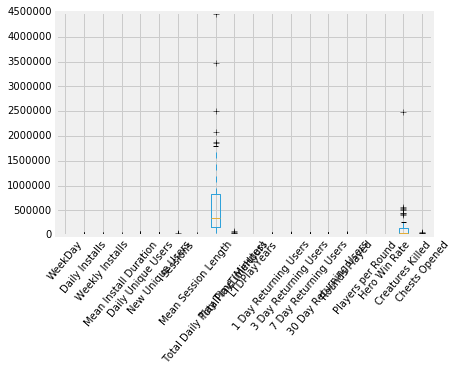

In [22]:
#Wade can you find a way to plot the points on a map here!

# Given three consecutive readings from a GPS system (p1, p2, p3), is it possible to detect if p2 is invalid?
# or Give a set of points p1 .. pn, detect all invalid readings!

#scatter_matrix(df1, alpha=0.2, diagonal='hist', figsize=(10, 5)); #
dfL1=dfL.drop(["LTD Play Time (Minutes)", '7D New Unique User', 'Gold Earned', 'Weekly Active Users', 'Sessions per User', 'Gold Spent'], axis=1)
dfL1.boxplot(figsize=(150,1150), rot=50 , return_type='axes');

In [7]:
df =  prepareDF(dfL, makeCopy=True)
scaler = StandardScaler()
X = scaler.fit_transform(df)

Dropping in prepareDF -  Index([], dtype='object')


In [9]:
df1= pd.DataFrame(X)
df1.columns=df.columns
displayDFs(df1)

count,89.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000,89.000
mean,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000
std,1.006,0.000,1.006,1.006,1.006,1.006,1.006,1.006,1.006,1.006,1.006,1.006,1.006,1.006,1.006,1.006,1.006,1.006,1.006,1.006,1.006,1.006,1.006,1.006,1.006,1.006,1.006
min,-2.573,0.000,-0.908,-3.254,-2.058,-0.940,-0.740,-0.833,-1.571,-3.279,-1.767,-1.765,-0.845,-0.845,-1.632,-1.623,-1.003,-0.950,-0.850,-0.894,-0.714,-2.462,-1.288,-0.457,-0.529,-0.582,-0.697
25%,-0.379,0.000,-0.667,-0.460,-0.729,-0.678,-0.584,-0.630,-0.787,-0.443,-0.700,-0.820,-0.643,-0.643,-0.892,-0.906,-0.710,-0.537,-0.622,-0.628,-0.603,-0.724,-0.636,-0.397,-0.472,-0.508,-0.588
50%,0.297,0.000,-0.410,-0.016,0.066,-0.410,-0.380,-0.398,-0.311,0.012,-0.310,-0.160,-0.421,-0.421,-0.023,-0.021,-0.408,-0.342,-0.350,-0.387,-0.391,-0.050,0.015,-0.286,-0.367,-0.359,-0.410
75%,0.610,0.000,0.339,0.555,0.572,0.492,0.168,0.221,0.782,0.538,0.339,0.657,0.223,0.223,0.716,0.716,0.465,0.126,0.281,0.268,0.101,0.659,1.317,0.010,-0.101,-0.086,0.084
max,0.932,0.000,3.770,2.027,2.907,3.763,5.228,4.963,3.540,1.996,3.245,3.185,4.981,4.981,1.842,1.856,2.987,6.317,4.518,3.316,4.370,2.397,1.317,8.253,4.830,4.778,4.586
,,,,,,,,,,,,,,,,,,,,,,,,,,,
,Date (float64),WeekDay (float64),Daily Installs (float64),Weekly Installs (float64),Mean Install Duration (float64),Daily Unique Users (float64),New Unique Users (float64),Sessions (float64),Sessions per User (float64),Weekly Active Users (float64),7D New Unique User (float64),Mean Session Length (float64),Total Daily Play Time (Minutes) (float64),TotalPlayTimeHours (float64),LTDPlayYears (float64),LTD Play Time (Minutes) (float64),1 Day Returning Users (float64),3 Day Returning Users (float64),7 Day Returning Users (float64),30 Day Returning Users (float64),Rounds Played (float64),Players per Round (float64),Hero Win Rate (float64),Creatures Killed (float64),Gold Spent (float64),Gold Earned (float64),Chests Opened (float64)
0,0.613,0.000,-0.862,-0.070,0.220,-0.882,-0.537,-0.794,-0.953,-0.216,0.273,-0.176,-0.806,-0.806,0.427,0.438,-0.958,-0.245,1.607,0.552,-0.698,-0.582,-1.288,-0.448,-0.472,-0.442,-0.678


## Predictions

In [49]:
# Lets convert the columns to numeric 
# Please see Prepare in Features.py 

df =  prepareDF(dfL, makeCopy=True)

# Review the resulting final data set;
#df = df.sample(frac=1).reset_index(drop=True)
display(dfL.head(), "==>" ,df.head() )

Dropping in prepareDF -  Index(['stored_at', 'measured_at'], dtype='object')


,stored_at,measured_at,is_valid,record_type,lat,lon,accuracy,speed,bearing,alt,location,activity,battery_level,rn
0,2016-04-12 00:40:40.032252,2016-04-11 20:45:23.0,1,passive,47.645,-122.137,52.004,0.000,0.000,0.000,None,null,None,11380
1,2016-03-19 10:42:42.242253,2016-03-19 10:00:36.0,1,gps,24.198,55.657,37.263,0.000,0.000,0.000,None,null,None,1620
2,2015-08-25 17:38:06.63088,2015-08-25 17:43:55.0,1,SyntheticData,45.064,-92.717,0.000,nan,nan,nan,None,null,None,20962
3,2015-08-25 17:34:07.650109,2015-08-25 17:39:55.0,2,SyntheticData,44.830,-93.668,0.000,nan,nan,nan,None,null,None,20988
4,2016-04-07 05:28:55.432304,2016-04-07 00:47:15.0,2,gps,47.654,-122.143,1000.000,0.000,0.000,0.000,None,null,None,11949


'==>'

,is_valid,record_type,lat,lon,accuracy,speed,bearing,alt,location,activity,battery_level,rn
0,0,4,47.645,-122.137,52.004,0.000,0.000,0.000,0,0,0,11380
1,0,2,24.198,55.657,37.263,0.000,0.000,0.000,0,0,0,1620
2,0,1,45.064,-92.717,0.000,0.000,0.000,0.000,0,0,0,20962
3,1,1,44.830,-93.668,0.000,0.000,0.000,0.000,0,0,0,20988
4,1,2,47.654,-122.143,1000.000,0.000,0.000,0.000,0,0,0,11949


Feature space holds 84 observations and 11 features
Unique target labels: [0 1]
* 0* 1* 2* 3* 4*
   DecisionTree Gini accuracy: 0.666667 
             precision    recall  f1-score   support

          0       0.71      0.79      0.75        53
          1       0.56      0.45      0.50        31

avg / total       0.66      0.67      0.66        84


* 0* 1* 2* 3* 4*
   DecisionTree Entr accuracy: 0.738095 
             precision    recall  f1-score   support

          0       0.75      0.87      0.81        53
          1       0.70      0.52      0.59        31

avg / total       0.73      0.74      0.73        84


* 0* 1* 2* 3* 4*
                 SVM accuracy: 0.750000 
             precision    recall  f1-score   support

          0       0.74      0.92      0.82        53
          1       0.78      0.45      0.57        31

avg / total       0.76      0.75      0.73        84


* 0* 1* 2* 3* 4*
                K-NN accuracy: 0.738095 
             precision    recall  f1-sco

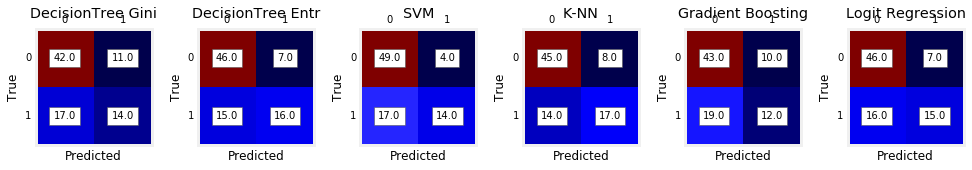

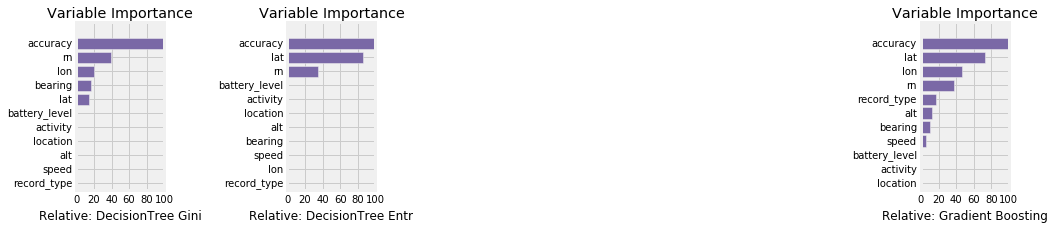

CPU times: user 1.25 s, sys: 39.1 ms, total: 1.29 s
Wall time: 1.27 s


In [50]:
%%time
cls = [# Comment/uncomment out any classfiers according to your need 
       # DO NOT CHANGE
        "DecisionTree Gini" , tree.DecisionTreeClassifier(max_depth=4, criterion="gini"),
        "DecisionTree Entr" , tree.DecisionTreeClassifier(max_depth=4, criterion="entropy"), 
        "SVM"               , sklearn.svm.SVC(), 
        #"Random Forest"     , sklearn.ensemble.RandomForestClassifier(),
        "K-NN"              , sklearn.neighbors.KNeighborsClassifier(),
        "Gradient Boosting" , sklearn.ensemble.RandomForestClassifier(),
        "Logit Regression"  , sklearn.linear_model.LogisticRegression()
];

y = df[predictColumn]
X = df.drop(predictColumn, axis=1)
(X1,y1,ra,cls) = Classify(X,y, True, drawConfusionMatrix=True, classifiers=cls, scale=True)


In [24]:
#get_ipython().reset()
decisionTrees = []

for k in range( int (len(cls)/2)) :
    d = cls[k*2+1];
    if (str(type(d)).find('DecisionTreeClassifier') > 0):
        decisionTrees.append(cls[k*2])
        decisionTrees.append(cls[k*2+1])

#d = DrawDecisionTree(X,y, decisionTrees, class_names);

In [ ]:
#
# Now we need to get the 
# Given three points, distance, angle, time difference, number of time that loc was marked invalid
#

1
2 lat-lon
1
==>
2 speed (1-2); time1 -2 , distance 1-2, angle 1-2-1, # of times 2 is Invalid 

1
1 speed (1-1); time1 -1 , distance 1-1, angle 1-1-1, # of times 1 was read
1
